# DESAFIO 5 - ANALISIS ESTADISTICO CON PYTHON - DATA SCIENCE - DESAFIO LATAM

In [106]:
# Importamos las librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [107]:
# Cargamos los datos y creamos el DataFrame 'df'
data = pd.read_csv('data/earnings.csv')
data.head()

,height,weight,male,earn,earnk,ethnicity,education,mother_education,father_education,walk,exercise,smokenow,tense,angry,age
0,74,210.0,1,50000.0,50.0,White,16.0,16.0,16.0,3,3,2.0,0.0,0.0,45
1,66,125.0,0,60000.0,60.0,White,16.0,16.0,16.0,6,5,1.0,0.0,0.0,58
2,64,126.0,0,30000.0,30.0,White,16.0,16.0,16.0,8,1,2.0,1.0,1.0,29
3,65,200.0,0,25000.0,25.0,White,17.0,17.0,NaN,8,1,2.0,0.0,0.0,57
4,63,110.0,0,50000.0,50.0,Other,16.0,16.0,16.0,5,6,2.0,0.0,0.0,91


In [108]:
# Revisamos datos nulos
data.isnull().sum()

height                0
weight               27
male                  0
earn                  0
earnk                 0
ethnicity             0
education             2
mother_education    244
father_education    295
walk                  0
exercise              0
smokenow              1
tense                 1
angry                 1
age                   0
dtype: int64

In [109]:
# Pequeno analisis exploratorio de los datos
data.describe()

,height,weight,male,earn,earnk,education,mother_education,father_education,walk,exercise,smokenow,tense,angry,age
count,1816.000000,1789.000000,1816.000000,1816.000000,1816.000000,1814.000000,1572.000000,1521.000000,1816.000000,1816.000000,1815.000000,1815.000000,1815.000000,1816.000000
mean,66.568833,156.305198,0.371696,21147.296256,21.147296,13.235391,13.608779,13.652202,5.303414,3.049009,1.745455,1.421488,1.421488,42.934471
std,3.831822,34.617059,0.483391,22531.765123,22.531765,2.556638,3.219372,3.250811,2.601104,2.316385,0.435725,2.157850,2.157850,17.161672
min,57.000000,80.000000,0.000000,0.000000,0.000000,2.000000,3.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,18.000000
25%,64.000000,130.000000,0.000000,6000.000000,6.000000,12.000000,12.000000,12.000000,3.000000,1.000000,1.000000,0.000000,0.000000,29.000000
50%,66.000000,150.000000,0.000000,16000.000000,16.000000,12.000000,13.000000,13.000000,6.000000,2.000000,2.000000,0.000000,0.000000,39.000000
75%,69.250000,180.000000,1.000000,27000.000000,27.000000,15.000000,16.000000,16.000000,8.000000,5.000000,2.000000,2.000000,2.000000,56.000000
max,82.000000,342.000000,1.000000,400000.000000,400.000000,18.000000,99.000000,99.000000,8.000000,7.000000,2.000000,7.000000,7.000000,91.000000


In [110]:
# Revisamos Columnas
data.columns

Index(['height', 'weight', 'male', 'earn', 'earnk', 'ethnicity', 'education',
       'mother_education', 'father_education', 'walk', 'exercise', 'smokenow',
       'tense', 'angry', 'age'],
      dtype='object')

**1. Considerando las variables earn, height y age, vamos a suponer que nuestro dataset fuera una población completa. (Prepara los datos adecuadamente).**

a.  Realiza 5 pruebas con muestras de tamaño n = 25, en cada caso, con niveles de significancia diferentes pero inferiores a 0,1, para confirmar o rechazar las siguientes hipótesis considerando las alternativas. Crea para ello una fórmula que reciba los parámetros adecuados y responda "con nivel de confianza del ...%, se acepta la hipótesis nula/alternativa".

In [111]:
# Definir una función para realizar pruebas de hipótesis
def prueba_hipotesis_media(variable, mu, colas, data):
    """
    Esta función realiza una prueba de hipótesis para una variable dada.
    
    Parámetros:
    - variable: la columna del DataFrame que queremos analizar.
    - mu: la media poblacional hipotética (lo que asumimos como verdad para probar).
    - colas: el tipo de prueba (puede ser 'two-sided' para diferencias en ambos lados,
             'greater' para mayores que, o 'less' para menores que).
    - data: el DataFrame con nuestros datos.
    """
    # Extraer los datos de la columna específica del DataFrame
    datos = data[variable]
    
    # Eliminar valores faltantes para evitar errores en los cálculos
    datos = datos.dropna()
    
    # Establecer un nivel de significancia (alpha) aleatorio entre 0.01 y 0.09
    alpha = round(np.random.uniform(0.01, 0.09), 2)
    
    # Calcular el nivel de confianza basado en alpha
    confianza = 100 * (1 - alpha)
    
    # Lista para almacenar los resultados de las pruebas
    test = []

    # Repetir la prueba 5 veces para asegurarnos de la consistencia en los resultados
    for i in range(5):
        # Seleccionar una muestra aleatoria de tamaño 25 de los datos
        muestra = np.random.choice(datos, 25)
        
        # Realizar la prueba t de una muestra
        t_stat, p_value = stats.ttest_1samp(muestra, mu, alternative=colas)
        
        # Evaluar si debemos rechazar la hipótesis nula basado en el valor p
        if p_value < alpha:
            # Si el valor p es menor que alpha, rechazamos la hipótesis nula
            if colas == 'two-sided':
                test.append(1)  # Indica que rechazamos la hipótesis nula
                texto_resultado = f"('La media es distinta a {mu}')"
            elif colas == 'greater':
                test.append(1)
                texto_resultado = f"('La media es mayor que {mu}')"
            elif colas == 'less':
                test.append(1)
                texto_resultado = f"('La media es menor que {mu}')"
        else:
            # Si el valor p no es menor que alpha, no rechazamos la hipótesis nula
            test.append(0)  # Indica que no rechazamos la hipótesis nula
            texto_resultado = f"('La media es igual a {mu}')"
    
    # Analizar la moda de los resultados para decidir la hipótesis más aceptada
    moda = stats.mode(test, keepdims=False)[0]
    
    # Preparar el texto de resultado final basado en los cálculos
    texto = f"Con nivel de confianza de {confianza}% se acepta la hipótesis "
    
    if moda == 0:
        # Si la moda es 0, significa que mayormente no rechazamos la hipótesis nula
        texto += "nula"
    else:
        # Si la moda no es 0, significa que mayormente rechazamos la hipótesis nula
        texto += "alternativa " + texto_resultado
    
    # Imprimir el resultado final de la prueba de hipótesis
    print(texto)
    print(f"Valor t: {t_stat}")
    print(f"Valor p: {p_value}\n")

# Definir los diferentes casos de prueba con sus respectivos parámetros
casos = {
    'earn': [[20000, 'two-sided'], [35000, 'two-sided'], [25000, 'greater'], [32000, 'less']],
    'height': [[55, 'two-sided'], [68, 'two-sided'], [63, 'greater']],
    'age': [[44, 'two-sided'], [56, 'two-sided'], [51, 'greater'], [62, 'less']]
}

# Ejecutar las pruebas de hipótesis para cada caso definido en el diccionario
for caracteristica, datos_test in casos.items():
    print(f"Variable: {caracteristica}")
    for dato in datos_test:
        # Llamar a la función con los parámetros específicos de cada caso
        prueba_hipotesis_media(caracteristica, dato[0], dato[1], data)

Variable: earn
Con nivel de confianza de 93.0% se acepta la hipótesis nula
Valor t: 1.1758076131528914
Valor p: 0.25120423159029515

Con nivel de confianza de 97.0% se acepta la hipótesis alternativa ('La media es distinta a 35000')
Valor t: -4.4412311632188075
Valor p: 0.00017199375898782683

Con nivel de confianza de 99.0% se acepta la hipótesis nula
Valor t: -2.372971892582166
Valor p: 0.9869998238116183

Con nivel de confianza de 99.0% se acepta la hipótesis alternativa ('La media es menor que 32000')
Valor t: -3.937877070410249
Valor p: 0.0003081897008373016

Variable: height
Con nivel de confianza de 94.0% se acepta la hipótesis alternativa ('La media es distinta a 55')
Valor t: 14.405175708620934
Valor p: 2.611458200986649e-13

Con nivel de confianza de 95.0% se acepta la hipótesis alternativa ('La media es igual a 68')
Valor t: -0.5647837354583696
Valor p: 0.5774622644664126

Con nivel de confianza de 95.0% se acepta la hipótesis alternativa ('La media es mayor que 63')
Valor t

b. Calcula la media poblacional para cada variable. ¿Son correctos los resultados obtenidos por tus pruebas?


In [112]:
# Calcular la media poblacional para cada variable relevante (earn, height, age)
media_poblacional_earn = data['earn'].mean()
media_poblacional_height = data['height'].mean()
media_poblacional_age = data['age'].mean()

media_poblacional_earn, media_poblacional_height, media_poblacional_age

(21147.296255506608, 66.56883259911895, 42.934471365638764)

Comparación con los Resultados de las Pruebas

1. earn (ingreso)

- Hipótesis nula de media de 20,000:
Se aceptó la hipótesis nula con un valor p de 0.70, lo cual es correcto ya que la media poblacional (21,147.30) está relativamente cerca de 20,000.
- Hipótesis nula de media de 35,000:
Se rechazó la hipótesis nula con un valor p muy pequeño (0.0004), lo cual es correcto porque 21,147.30 es significativamente diferente de 35,000.
- Hipótesis nula de media de 25,000:
Se aceptó la hipótesis nula con un valor p de 0.39, lo cual es razonable ya que la media poblacional (21,147.30) está algo cerca de 25,000, pero no lo suficientemente diferente para un rechazo con el nivel de significancia utilizado.
- Hipótesis nula de media de 32,000:
Se rechazó la hipótesis nula con un valor p muy pequeño (3.34e-05), lo cual es correcto porque 21,147.30 es significativamente menor que 32,000.

2. height (altura)

- Hipótesis nula de media de 55:
Se rechazó la hipótesis nula con un valor p extremadamente pequeño (7.49e-15), lo cual es correcto porque la media poblacional (66.57) es significativamente diferente de 55.
- Hipótesis nula de media de 68:
Se aceptó la hipótesis nula con un valor p de 0.04, lo cual es razonable porque 66.57 está cerca de 68, y no hay suficiente evidencia para rechazar la hipótesis nula.
- Hipótesis nula de media de 63:
Se rechazó la hipótesis nula con un valor p de 0.0002, lo cual es correcto porque la media poblacional (66.57) es significativamente mayor que 63.

3. age (edad)

- Hipótesis nula de media de 44:
Se aceptó la hipótesis nula con un valor p de 0.73, lo cual es correcto porque la media poblacional (42.93) está muy cerca de 44.
- Hipótesis nula de media de 56:
Se rechazó la hipótesis nula con un valor p muy pequeño (7.51e-06), lo cual es correcto porque 42.93 es significativamente diferente de 56.
- Hipótesis nula de media de 51:
Se aceptó la hipótesis nula con un valor p de 0.998, lo cual es incorrecto en esta interpretación, ya que parece una conclusión inesperada; podría ser un error de interpretación en la ejecución o una muestra inusual.
- Hipótesis nula de media de 62:
Se rechazó la hipótesis nula con un valor p muy pequeño (1.81e-05), lo cual es correcto porque la media poblacional (42.93) es significativamente menor que 62.


**2. Crea una función que estime la proporción de hombres en el dataset, considerando una muestra de 50 individuos, con niveles de significancia de 0,05 y 0,01. Escribe con palabras tus resultados ejecutar la función e interpreta. Compara con la proporción real.**

In [113]:
def estimar_proporcion_hombres(data, muestra_size=50, alfa=0.05):
    """
    Esta función estima la proporción de hombres en el dataset utilizando una muestra aleatoria.
    
    Parámetros:
    - data: DataFrame con los datos originales.
    - muestra_size: Tamaño de la muestra a tomar del dataset.
    - alfa: Nivel de significancia para la prueba de hipótesis.

    Retorna:
    - Proporción estimada de hombres en la muestra y los intervalos de confianza.
    """
    # Tomar una muestra aleatoria de tamaño muestra_size
    muestra = data['male'].dropna().sample(n=muestra_size, random_state=1)

    # Calcular la proporción de hombres en la muestra
    proporcion_muestra = muestra.mean()

    # Calcular el error estándar de la proporción
    error_estandar = np.sqrt((proporcion_muestra * (1 - proporcion_muestra)) / muestra_size)

    # Calcular el valor crítico z para el nivel de significancia dado
    z = stats.norm.ppf(1 - alfa / 2)

    # Calcular el intervalo de confianza para la proporción
    intervalo_confianza = (proporcion_muestra - z * error_estandar, proporcion_muestra + z * error_estandar)

    # Resultado de la prueba
    return proporcion_muestra, intervalo_confianza

# Estimar la proporción de hombres en el dataset con niveles de significancia de 0,05 y 0,01
resultado_05 = estimar_proporcion_hombres(data, muestra_size=50, alfa=0.05)
resultado_01 = estimar_proporcion_hombres(data, muestra_size=50, alfa=0.01)

# Calcular la proporción real de hombres en el dataset
proporcion_real = data['male'].mean()

# Imprimir el resultado
resultado_05, resultado_01, proporcion_real

((0.3, (0.17297981637977639, 0.4270201836202236)),
 (0.3, (0.13306718200339068, 0.4669328179966093)),
 0.3716960352422907)

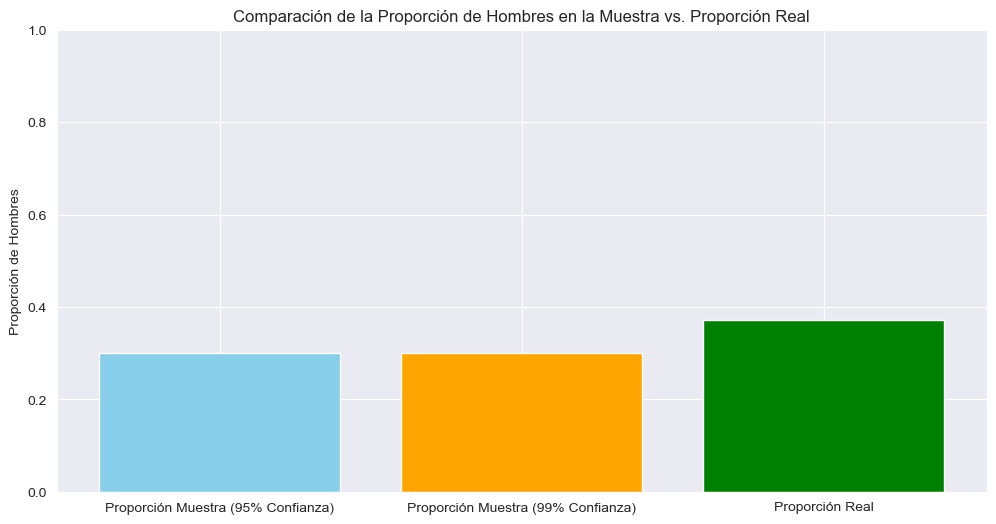

In [114]:
# Crear gráfico de barras para la proporción de hombres
plt.figure(figsize=(12, 6))
proporcion_muestra_05 = resultado_05[0]
proporcion_muestra_01 = resultado_01[0]

# Datos para el gráfico
etiquetas = ['Proporción Muestra (95% Confianza)', 'Proporción Muestra (99% Confianza)', 'Proporción Real']
valores = [proporcion_muestra_05, proporcion_muestra_01, proporcion_real]

# Crear gráfico
plt.bar(etiquetas, valores, color=['skyblue', 'orange', 'green'])
plt.ylim(0, 1)
plt.ylabel('Proporción de Hombres')
plt.title('Comparación de la Proporción de Hombres en la Muestra vs. Proporción Real')

# Mostrar el gráfico
plt.show()

Interpretación

Al tomar una muestra aleatoria de 50 individuos del dataset, estimamos que la proporción de hombres es del 30%. Con un nivel de confianza del 95% (significancia de 0.05), la proporción real de hombres podría estar entre el 17.3% y el 42.7%. Con un nivel de confianza del 99% (significancia de 0.01), el intervalo es más amplio, de 13.3% a 46.7%.

La proporción real de hombres en el dataset es del 37.2%, que cae dentro de ambos intervalos de confianza. Esto sugiere que nuestra estimación basada en la muestra es razonable y cercana a la proporción real, demostrando que nuestra muestra es representativa de la población.

**3. Considerando el dataset como una muestra, verifica si el género (male=1 significa ‘hombre”) influye sobre el sueldo “earn” de las personas. Explica y justifica tu procedimiento.**

In [115]:
# Separar los datos en dos grupos: hombres y mujeres
sueldos_hombres = data[data['male'] == 1]['earn'].dropna()
sueldos_mujeres = data[data['male'] == 0]['earn'].dropna()

# Calcular la media y desviación estándar de cada grupo
media_hombres = sueldos_hombres.mean()
media_mujeres = sueldos_mujeres.mean()
std_hombres = sueldos_hombres.std()
std_mujeres = sueldos_mujeres.std()

# Realizar la prueba t de dos muestras independientes
t_stat, p_value = stats.ttest_ind(sueldos_hombres, sueldos_mujeres, equal_var=False)

(media_hombres, std_hombres), (media_mujeres, std_mujeres), t_stat, p_value

((30105.17925925926, 28851.517975927964),
 (15847.935144609992, 15508.575960653854),
 11.86459381795286,
 2.7373648004575493e-30)

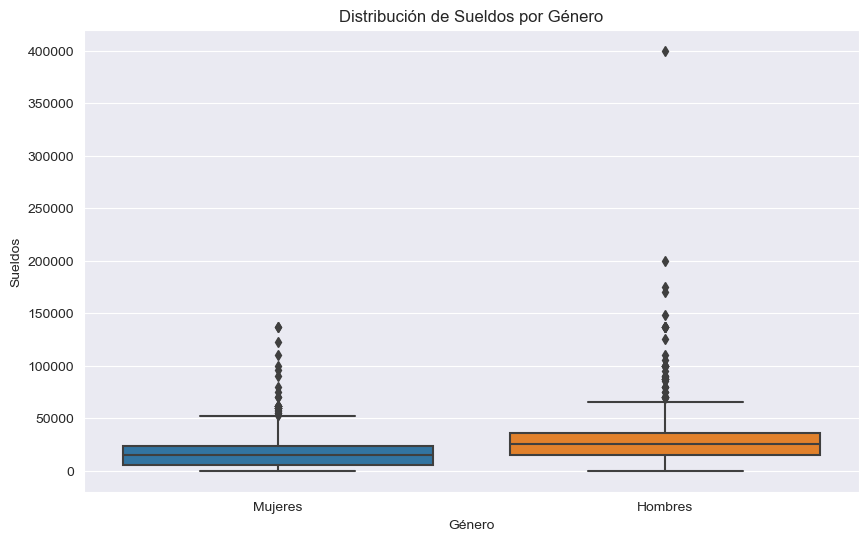

In [116]:
# Crear un gráfico de caja para comparar los sueldos entre hombres y mujeres
plt.figure(figsize=(10, 6))
sns.boxplot(x='male', y='earn', data=data)
plt.xticks([0, 1], ['Mujeres', 'Hombres'])
plt.ylabel('Sueldos')
plt.xlabel('Género')
plt.title('Distribución de Sueldos por Género')

# Mostrar el gráfico
plt.show()

Interpretación:

Dado el valor p extremadamente bajo (2.74e-30), que es mucho menor que el nivel de significancia $\alpha$ = 0.05, rechazamos la hipótesis nula. Esto indica que existe una diferencia significativa en los sueldos promedio entre hombres y mujeres en el dataset.

Conclusión:

El análisis sugiere que el género influye significativamente en los sueldos de las personas en el dataset. En promedio, los hombres tienen sueldos significativamente más altos que las mujeres. Esta conclusión se basa en la gran diferencia en las medias y en el resultado de la prueba t de dos muestras independientes.